In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

import datasets
from sklearn.metrics import roc_auc_score

import utils

In [6]:
train_ds, valid_ds, test_ds = utils.load_dataset()

Found cached dataset civil_comments (/home/johnny/.cache/huggingface/datasets/civil_comments/default/0.9.0/e7a3aacd2ab7d135fa958e7209d10b1fa03807d44c486e3c34897aa08ea8ffab)


  0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
test_ds

Dataset({
    features: ['text', 'toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit', 'label'],
    num_rows: 1804874
})

In [4]:
labels = test_ds['toxicity']
scores = np.load('scores/ngram.npy')
df = pd.DataFrame(data={'toxicity' : labels, 'scores' : scores})

In [6]:
df['toxic'] = test_ds['label']

In [7]:
df['toxic'].sum()

5788

In [8]:
df['toxic'].mean()

0.05947390053431977

<AxesSubplot:xlabel='toxicity', ylabel='scores'>

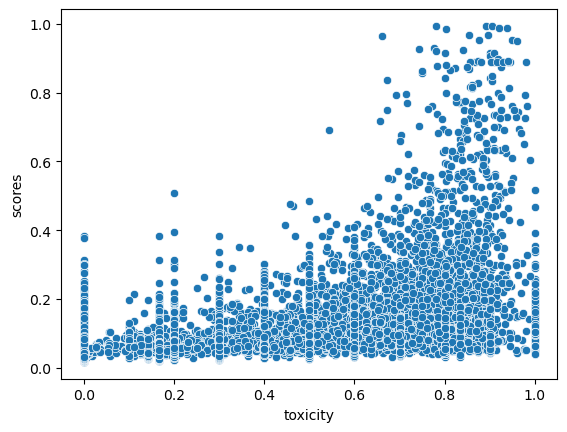

In [9]:
sns.scatterplot(data=df, x='toxicity', y='scores')

In [10]:
roc_auc_score(df['toxic'], df['scores'])

0.912853832433737